In [5]:
import pandas as pd

# Load dataset
df = pd.read_csv("youtube_analytics.csv")

# View basic info
df.info()

# Preview the first few rows
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 575610 entries, 0 to 575609
Data columns (total 27 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   index                          575610 non-null  int64  
 1   totalviews/channelelapsedtime  575610 non-null  float64
 2   channelId                      575610 non-null  object 
 3   videoCategoryId                575610 non-null  int64  
 4   channelViewCount               575610 non-null  int64  
 5   likes/subscriber               575610 non-null  float64
 6   views/subscribers              575610 non-null  float64
 7   videoCount                     575610 non-null  int64  
 8   subscriberCount                575610 non-null  int64  
 9   videoId                        575610 non-null  object 
 10  dislikes/views                 575610 non-null  float64
 11  channelelapsedtime             575610 non-null  int64  
 12  comments/subscriber           

,index,totalviews/channelelapsedtime,channelId,videoCategoryId,channelViewCount,likes/subscriber,views/subscribers,videoCount,subscriberCount,videoId,...,comments/views,totvideos/videocount,elapsedtime,videoLikeCount,videoDislikeCount,dislikes/subscriber,totviews/totsubs,views/elapsedtime,videoPublished,VideoCommentCount
0,0,0.165199,UCdzU3DSGzyWzN2118yd9X9g,22,14654,0.555556,95.111111,30,18,--DwgB78t-c,...,0.000000,488.466667,50040,10,1,0.055556,814.111111,0.034213,2012-01-19T18:38:28.000Z,0
1,1,1.133820,UC0UnhAG47DRyVZGVcbhAXhQ,10,105909,0.239130,59.326087,51,184,--NZRkXBV7k,...,0.000183,2076.647059,22080,44,3,0.016304,575.592391,0.494384,2015-03-30T04:04:40.000Z,2
2,2,0.668120,UCXjtAvK5P3wXBGh0vbGylzg,27,48265,0.023669,10.289941,72,338,--hoQ2sGG4M,...,0.000575,670.347222,71544,8,1,0.002959,142.795858,0.048613,2009-08-07T06:51:10.000Z,2
3,3,25.653505,UCeKHMeUlcLNPLCLUfZUQI2w,26,2116722,0.007301,0.884178,172,22051,--sBoaqBlzA,...,0.000513,12306.523256,54096,161,6,0.000272,95.992109,0.360415,2011-08-04T01:07:38.000Z,10
4,4,52.773778,UCNWPDyaWf2eAHnofFLSnEMg,20,1649075,0.004545,10.004545,2777,220,--7h1S4neDM,...,0.000000,593.833273,30120,1,0,0.000000,7495.795455,0.073074,2014-04-29T15:44:44.000Z,0


In [6]:
# Check for missing values
df.isnull().sum()

# Option: Drop rows with too many missing values
df.dropna(thresh=3, inplace=True)  # keep rows with at least 3 non-null entries

# Option: Fill missing numerical columns with 0
df.fillna(0, inplace=True)


In [10]:
print(df.columns.tolist())


['index', 'totalviews/channelelapsedtime', 'channelId', 'videoCategoryId', 'channelViewCount', 'likes/subscriber', 'views/subscribers', 'videoCount', 'subscriberCount', 'videoId', 'dislikes/views', 'channelelapsedtime', 'comments/subscriber', 'likes/views', 'channelCommentCount', 'videoViewCount', 'likes/dislikes', 'comments/views', 'totvideos/videocount', 'elapsedtime', 'videoLikeCount', 'videoDislikeCount', 'dislikes/subscriber', 'totviews/totsubs', 'views/elapsedtime', 'videoPublished', 'VideoCommentCount']


In [15]:
# Ensure datetime is parsed
df['videoPublished'] = pd.to_datetime(df['videoPublished'], errors='coerce')

# 📅 Time-based Features
df['year'] = df['videoPublished'].dt.year
df['month'] = df['videoPublished'].dt.month
df['dayofweek'] = df['videoPublished'].dt.dayofweek

# 📈 Engagement Metrics
df['like_ratio'] = df['videoLikeCount'] / (df['videoLikeCount'] + df['videoDislikeCount'] + 1e-6)
df['comment_ratio'] = df['VideoCommentCount'] / (df['videoViewCount'] + 1e-6)
df['view_to_subscriber_ratio'] = df['videoViewCount'] / (df['subscriberCount'] + 1e-6)
df['like_to_view_ratio'] = df['videoLikeCount'] / (df['videoViewCount'] + 1e-6)

# 📊 Channel-Level Normalized Metrics
df['views_per_video'] = df['channelViewCount'] / (df['videoCount'] + 1e-6)
df['subs_per_video'] = df['subscriberCount'] / (df['videoCount'] + 1e-6)


In [16]:
# Check for missing values
df.isnull().sum()

# Summary statistics
df.describe()


,index,totalviews/channelelapsedtime,videoCategoryId,channelViewCount,likes/subscriber,views/subscribers,videoCount,subscriberCount,dislikes/views,channelelapsedtime,...,VideoCommentCount,year,month,dayofweek,like_ratio,comment_ratio,view_to_subscriber_ratio,like_to_view_ratio,views_per_video,subs_per_video
count,575610.000000,575610.000000,575610.000000,5.756100e+05,575610.000000,575610.000000,575610.000000,5.756100e+05,575610.000000,575610.000000,...,575610.000000,575610.000000,575610.000000,575610.000000,575610.000000,575610.000000,5.756100e+05,575610.000000,5.756100e+05,5.756100e+05
mean,287804.500000,713.682808,17.560551,4.829119e+07,0.562041,308.993792,1204.464627,8.097598e+04,-0.019370,67941.305267,...,39.082997,2011.477843,6.426645,2.932760,0.859925,-0.005560,7.397981e+08,-0.042364,1.078754e+07,2.514715e+06
std,166164.438561,6481.875213,7.904187,4.630822e+08,2.804067,1584.321770,8303.754974,6.033393e+05,0.139794,20629.159278,...,557.811895,2.274364,3.418529,2.017449,0.215742,2.383811,1.176534e+11,21.286088,6.115365e+09,4.700700e+08
min,0.000000,0.000000,1.000000,0.000000e+00,-1.000000,-1.000000,0.000000,0.000000e+00,-1.000000,888.000000,...,-1.000000,2005.000000,1.000000,0.000000,0.000000,-1286.001286,-1.000000e+06,-15535.015535,0.000000e+00,0.000000e+00
25%,143902.250000,0.773417,10.000000,5.045000e+04,0.002832,0.919155,17.000000,3.800000e+01,0.000000,51984.000000,...,1.000000,2010.000000,3.000000,1.000000,0.827430,0.000062,1.320493e+00,0.001304,1.806112e+03,1.400000e+00
50%,287804.500000,6.213229,20.000000,4.086660e+05,0.029412,11.767535,70.000000,4.080000e+02,0.000176,68400.000000,...,4.000000,2012.000000,6.000000,3.000000,0.949413,0.000541,1.562643e+01,0.002932,5.355758e+03,5.636364e+00
75%,431706.750000,56.610846,24.000000,3.616452e+06,0.273810,120.648028,336.000000,5.319000e+03,0.000554,85824.000000,...,14.000000,2013.000000,9.000000,5.000000,1.000000,0.001580,1.652679e+02,0.006358,1.785330e+04,2.665696e+01
max,575609.000000,683532.725598,44.000000,2.379817e+10,505.000000,279803.000000,415500.000000,2.525311e+07,0.322981,108913.000000,...,191498.000000,2015.000000,12.000000,6.000000,1.000000,1.003530,8.543868e+13,1.418500,4.404297e+12,2.192580e+11


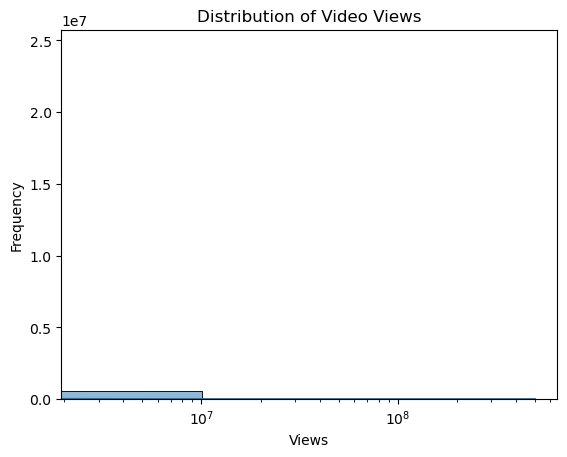

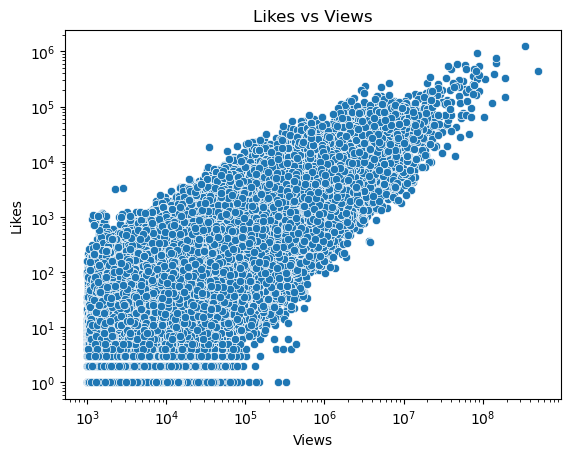

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# View counts
sns.histplot(df['videoViewCount'], bins=50, kde=True)
plt.title('Distribution of Video Views')
plt.xlabel('Views')
plt.ylabel('Frequency')
plt.xscale('log')
plt.show()

# Likes vs Views
sns.scatterplot(x='videoViewCount', y='videoLikeCount', data=df)
plt.xscale('log')
plt.yscale('log')
plt.title('Likes vs Views')
plt.xlabel('Views')
plt.ylabel('Likes')
plt.show()


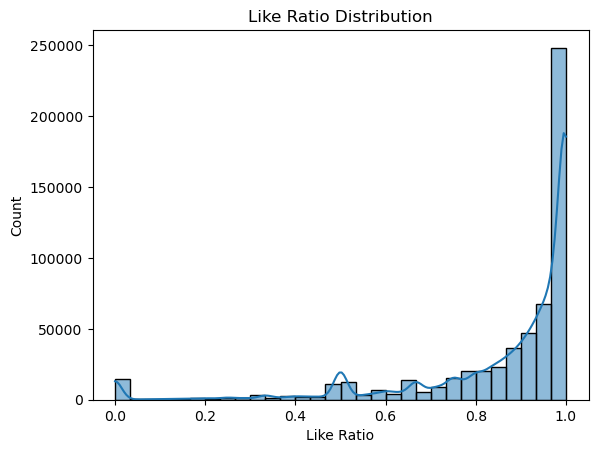

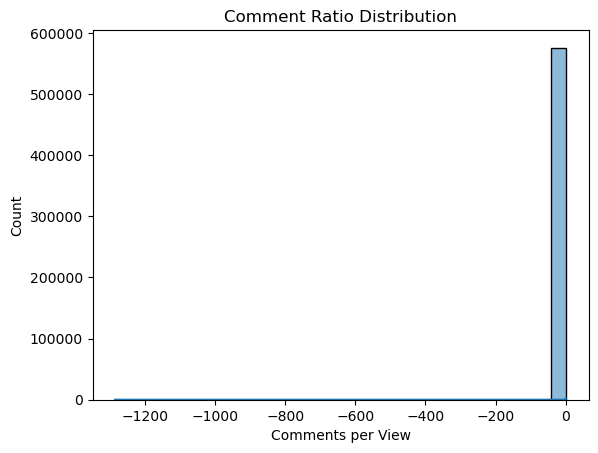

In [18]:
# Like ratio
sns.histplot(df['like_ratio'], bins=30, kde=True)
plt.title('Like Ratio Distribution')
plt.xlabel('Like Ratio')
plt.show()

# Comment ratio
sns.histplot(df['comment_ratio'], bins=30, kde=True)
plt.title('Comment Ratio Distribution')
plt.xlabel('Comments per View')
plt.show()


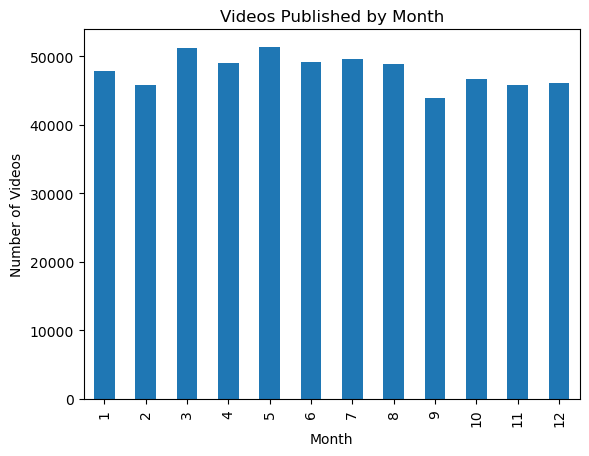

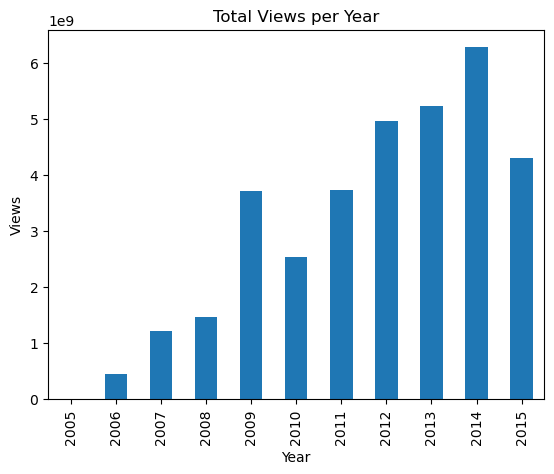

In [19]:
# Monthly posting volume
df['month'].value_counts().sort_index().plot(kind='bar')
plt.title('Videos Published by Month')
plt.xlabel('Month')
plt.ylabel('Number of Videos')
plt.show()

# Views over years
df.groupby('year')['videoViewCount'].sum().plot(kind='bar')
plt.title('Total Views per Year')
plt.ylabel('Views')
plt.xlabel('Year')
plt.show()


In [32]:
import numpy as np  # ✅ Add this line if it's not already present

features = [
    'likes/views', 'comments/views', 'views/subscribers',
    'likes/subscriber', 'comments/subscriber', 'views/elapsedtime'
]

clustering_df = df[features].replace([np.inf, -np.inf], np.nan).dropna()


In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
scaled = scaler.fit_transform(clustering_df)

kmeans = KMeans(n_clusters=4, random_state=42)
df['engagement_cluster'] = kmeans.fit_predict(scaled)


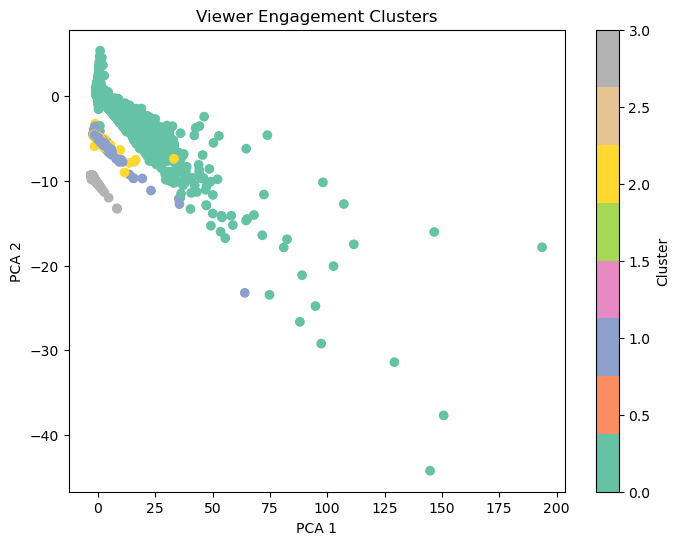

In [27]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
reduced = pca.fit_transform(scaled)

plt.figure(figsize=(8, 6))
plt.scatter(reduced[:, 0], reduced[:, 1], c=df['engagement_cluster'], cmap='Set2')
plt.title("Viewer Engagement Clusters")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label="Cluster")
plt.show()


In [28]:
cluster_summary = df.groupby('engagement_cluster')[features].mean()
print(cluster_summary)


                    likes/views  comments/views  views/subscribers  \
engagement_cluster                                                   
0                      0.006378        0.001683         312.049352   
1                      0.004690       -1.000000         270.302015   
2                     -1.000000        0.002045         152.946079   
3                     -1.000000       -1.000000         222.303466   

                    likes/subscriber  comments/subscriber  views/elapsedtime  
engagement_cluster                                                            
0                           0.594864             0.165726           1.504293  
1                           0.494664            -1.000000           1.634703  
2                          -1.000000             0.028143           2.042403  
3                          -0.982768            -0.984854           2.137084  


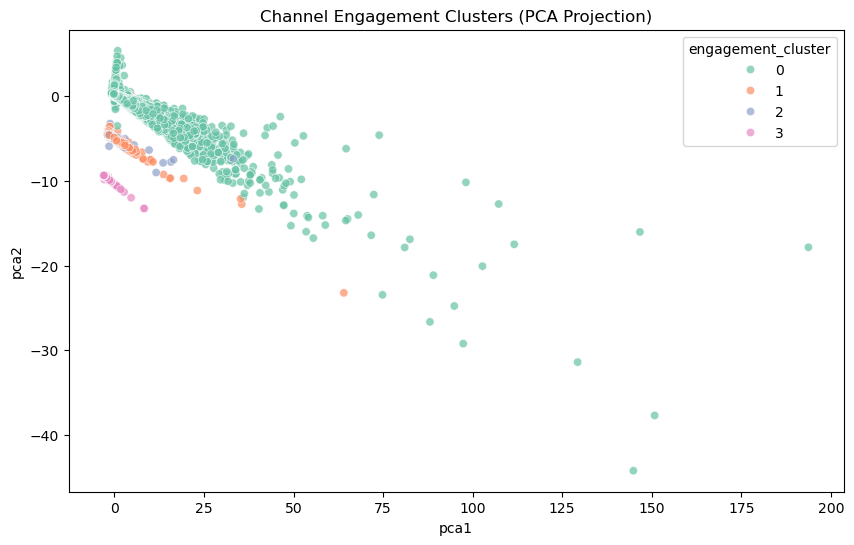

In [29]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
components = pca.fit_transform(scaled)

df['pca1'] = components[:, 0]
df['pca2'] = components[:, 1]

plt.figure(figsize=(10,6))
sns.scatterplot(x='pca1', y='pca2', hue='engagement_cluster', palette='Set2', data=df, alpha=0.7)
plt.title("Channel Engagement Clusters (PCA Projection)")
plt.show()


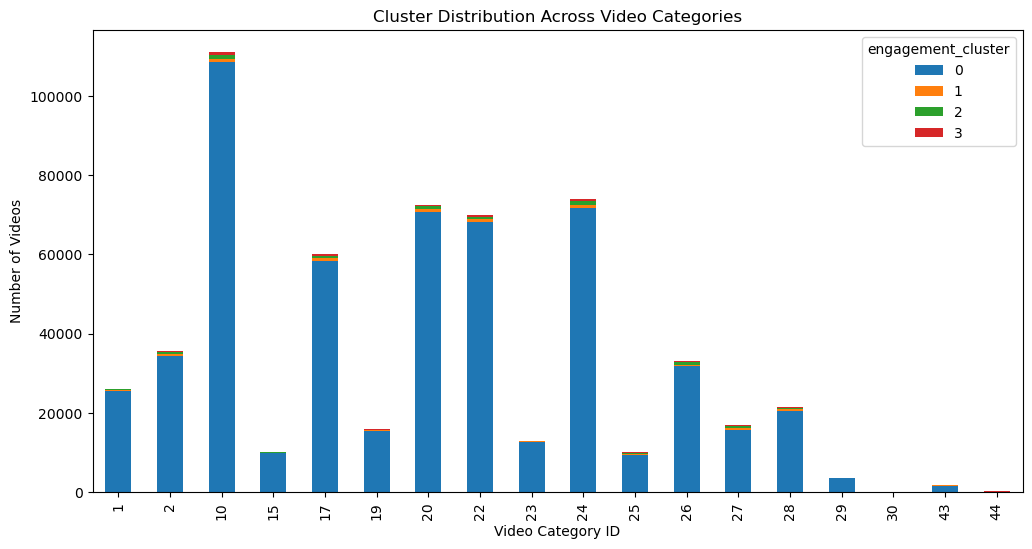

In [30]:
# Example: Cluster counts by videoCategoryId
cluster_counts = df.groupby(['videoCategoryId', 'engagement_cluster']).size().unstack(fill_value=0)
cluster_counts.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title("Cluster Distribution Across Video Categories")
plt.xlabel("Video Category ID")
plt.ylabel("Number of Videos")
plt.show()


In [31]:
df.to_csv('youtube_engagement_clustered.csv', index=False)
